In [66]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE

In [67]:
stop_words = set(nltk.corpus.stopwords.words("english"))
with open('dems.txt', 'r',encoding='UTF8') as file:
    dem_text = [line.strip('\n') for line in file]

with open('gop.txt', 'r',encoding='UTF8') as file:
    gop_text = [line.strip('\n') for line in file]

vectorizer = CountVectorizer(input=dem_text + gop_text,stop_words=stop_words,max_features=1000)
dem_bow = vectorizer.fit_transform(dem_text)
gop_bow = vectorizer.fit_transform(gop_text)

In [68]:
col=vectorizer.get_feature_names()
df_D=pd.DataFrame(data=dem_bow.toarray(),columns=col)
df_D['class']='D'
df_R=pd.DataFrame(data=gop_bow.toarray(),columns=col)
df_R['class']='R'
df=df_D.append(df_R, ignore_index=True)

In [69]:
df_summ=df.describe().transpose()
df_summ.to_csv('summ.csv')

In [70]:
#Consider only Alphabets and words with length >3
df_columns=[]
for i in df.columns:
    if(len(i)>3 and i.isalpha()):
        df_columns.append(i)
df=df[df_columns]

,abbottnews,ability,able,abroad,absurd,accelerate,accepting,acces,access,across,...,xjgryfasur,yards,year,years,yesterday,york,zfhomgzhmq,zmnncyiefk,znscrupwna,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,D
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D
3,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,D
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,R
396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,R
397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,R
398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,R


In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:,0:119]
y = df.iloc[:,-1]   
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs      Score
50      businesses  19.200000
83           chief  19.173913
49        business  12.250000
18        american  11.645161
19       americans   9.965517
20         another   8.066667
42           biden   6.250000
14  administration   5.444444
9           across   4.500000
56        campaign   4.500000


In [72]:
X = df.loc[:, df.columns != 'class']  # Features
y = df['class'] 

In [73]:
#PCA
pca=PCA()
principalComponents=pca.fit_transform(X)
principalDf=pd.DataFrame(data=principalComponents)
principalDf
X_p = principalDf # Features
y = df['class'] 

In [74]:
explained_variance = pca.explained_variance_ratio_
#explained_variance

In [75]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [76]:
tsne = TSNE()
X_t = tsne.fit_transform(X)

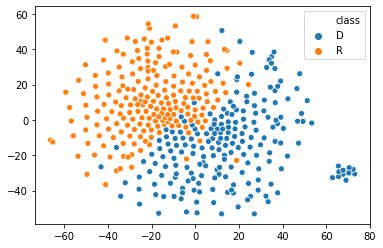

In [77]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full')

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y, test_size=0.3)

In [97]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='lbfgs',C=100,max_iter=5000)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=8,p=1,metric='minkowski',weights='distance')))
models.append(('DecisionTree', DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)))
models.append(('RAN', RandomForestClassifier(criterion='entropy',n_estimators=1000,random_state=0)))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC(gamma='scale',kernel='rbf',C=10)))

In [98]:
for name,model in models:
    model.fit(X_train,y_train)    
    y_pred=model.predict(X_test)
    correct = (y_test == y_pred).sum()
    incorrect = (y_test != y_pred).sum()
    accuracy = correct / (correct + incorrect) * 100
    print(name,accuracy)

Logistic Regression 94.16666666666667
KNN 72.5
DecisionTree 89.16666666666667
RAN 95.83333333333334
Naive Bayes 85.0
Support Vector Machine 95.83333333333334
